# ЛР 5 — ПРИМЕНЕНИЕ СИНГУЛЯРНОГО СПЕКТРАЛЬНОГО АНАЛИЗА ДЛЯ ДЕКОМПОЗИЦИИ ВРЕМЕННОГО РЯДА

***

Кабанов Евгений, РИМ-181226, 9 вариант

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [166]:
def SSA_modes(F, L):
    """
    Функция для сингулярного разложения временного ряда
    F - Временной ряд, L - Длина окна
    """
    N = len(F)
    K = N - L + 1
    X = np.empty((L, K))
    
    for i in range(0,L):
        for j in range(0,K):
            X[i, j] = F[i + j]

    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    V = np.dot(X.T, U)
    return A, U, V

In [834]:
ts = np.array([3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3]) # мини временной ряд 
A, U, V = SSA_modes(ts, 3) # его разложение с длиной окна = 3 
print('Для A: ', A) # собственные числа
print('Для U: ',U) # собственные вектора
print('Для V: ',V) # траекторные вектора

Для A:  [129.66842566  12.           3.33157434]
Для U:  [[-5.78869570e-01  7.07106781e-01  4.06091149e-01]
 [-5.74299610e-01  2.22044605e-16 -8.18645196e-01]
 [-5.78869570e-01 -7.07106781e-01  4.06091149e-01]]
Для V:  [[-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00  0.00000000e+00  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  4.44089210e-16 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00  0.00000000e+00  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  4.44089210e-16 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00  0.00000000e+00  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]]


In [8]:
def SSA_group(A, U, V, N, I):
    """
    Функция для восстановления ряда
    Входные параметры: 
    массив собственных значений A, 
    массив собственных векторов U, 
    массив траекторных векторов V, 
    длина ряда N и массив группировки компонент I.
    """
    L = len(A)
    K = N - L + 1
    V = V.transpose()
    Z = np.dot(U[:, I], V[I, :])

    G = np.zeros(N)
    L_min = min(L,K)
    K_max = max(L,K)
    
    for k in range(N):
        if (0 <= k < L_min - 1):
            sum_Z = Z[0, k]
            
            for m in range(k):
                sum_Z += Z[m, k-m]
            G[k] = 1 / (k + 1) * sum_Z
            
        if (L_min - 1 <= k < K_max):
            sum_Z = Z[0, k]
            
            for m in range(L_min - 1):
                sum_Z += Z[m, k-m]
            G[k] = 1 / L_min * sum_Z
            
        if (K_max <= k < N + 1):
            sum_Z = Z[k - K_max + 1, 0]
            
            for m in range(k - K_max + 1, N - K_max):
                sum_Z += Z[m, k-m]
                
            if (k - K_max + 1 == N - K_max):
                sum_Z = Z[k - K_max + 1, N - K_max]
            G[k] = 1 / (N - k) * sum_Z
            
    return G

[3. 2. 1. 2. 3. 2. 1. 2. 3. 2. 1. 2. 3.]


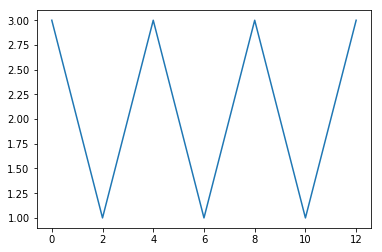

In [835]:
ts1 = SSA_group(A, U, V, len(ts),  [0, 1, 2])
print(ts1)
plt.plot(ts1)

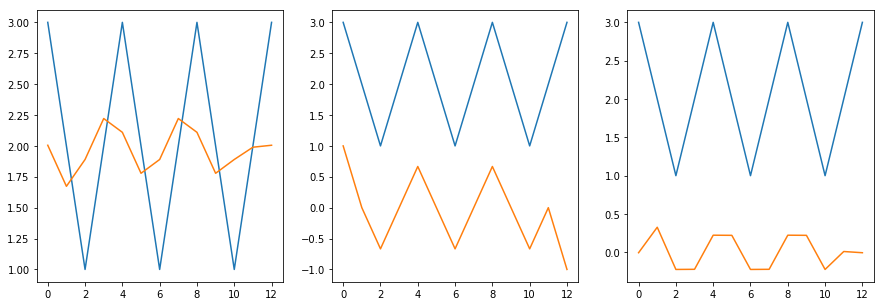

In [842]:
plt.figure(figsize=(15,5))
ts1_1 = SSA_group(A, U, V, len(ts),  [0])
plt.subplot(1,3,1)
plt.plot(ts)
plt.plot(ts1_1)
ts1_2 = SSA_group(A, U, V, len(ts),  [1])
plt.subplot(1,3,2)
plt.plot(ts)
plt.plot(ts1_2)
ts1_3 = SSA_group(A, U, V, len(ts),  [2])
plt.subplot(1,3,3)
plt.plot(ts)
plt.plot(ts1_3)
plt.show()

In [ ]:
SSA_plot(ts, U, V, [0, 1, 2])

## Применение функций на ВР

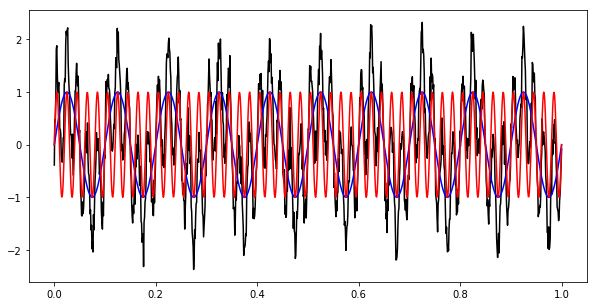

In [821]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50 
F=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()

min = 32
min = 70
min = 41


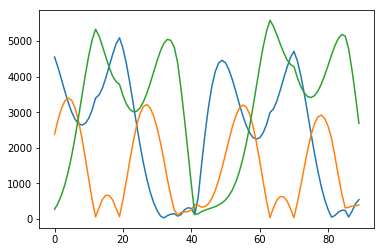

In [734]:
for i in range(0,3): 
    gr=[] 
    for L in range (10,100): 
        A, U, V = SSA_modes(F, L) 
        gr.append(abs(A[i+1]-A[i])) 
    print("min = {}" .format(gr.index(min(gr[10:])))) 
    plt.plot(gr)

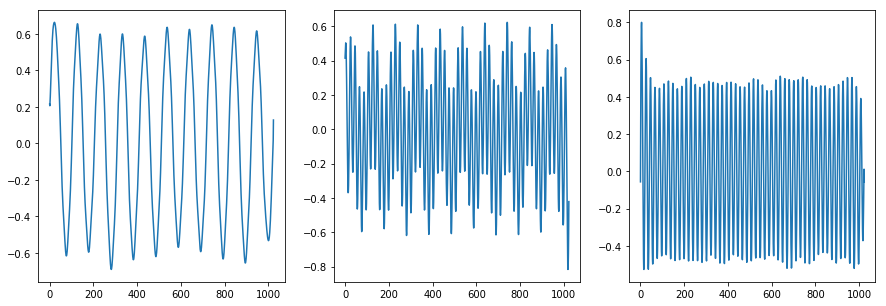

In [822]:
A, U, V = SSA_modes(F, 41)

plt.figure(figsize=(15,5))
F1_1 = SSA_group(A, U, V, len(F),  [0])
plt.subplot(1,3,1)
plt.plot(F1_1)
F1_2 = SSA_group(A, U, V, len(F),  [1])
plt.subplot(1,3,2)
plt.plot(F1_2)
F1_3 = SSA_group(A, U, V, len(F),  [2])
plt.subplot(1,3,3)
plt.plot(F1_3)
plt.show()

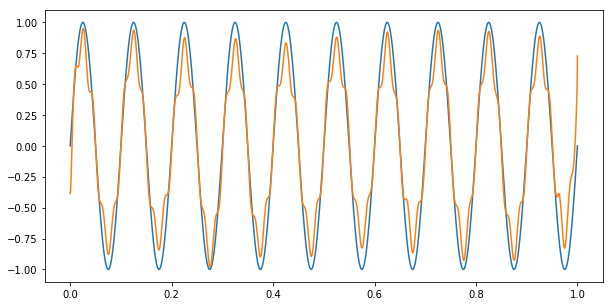

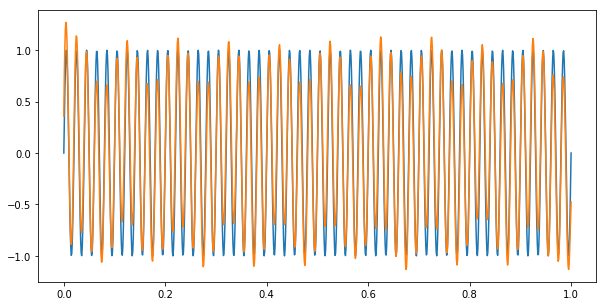

In [823]:
plt.figure(figsize = (10, 5))
I = [0,3]
F1 = SSA_group(A, U, V, len(F), I)
plt.plot(t, np.sin(2*np.pi*f1*t))
plt.plot(t,F1)
plt.show()

plt.figure(figsize = (10, 5))
I = [2,1]
F1 = SSA_group(A, U, V, len(F), I)
plt.plot(t, np.sin(2*np.pi*f2*t))
plt.plot(t,F1)
plt.show()

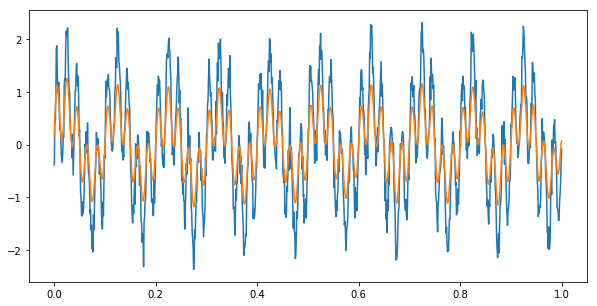

In [824]:
plt.figure(figsize = (10, 5))
I = [0,2]
F1 = SSA_group(A, U, V, len(F), I)
plt.plot(t, F)
plt.plot(t,F1)
plt.show()

## Тренд для сильнозашумленного ВР

In [844]:
t = np.linspace(0, 4, 4096)
F = np.exp(-0.4*np.pi*t) + 0.5*rand.randn(len(t))

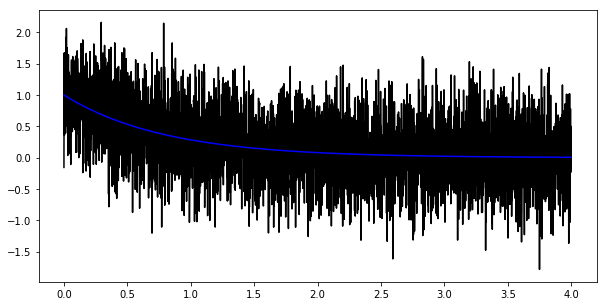

In [845]:
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, np.exp(-0.4*np.pi*t), 'b')
plt.show()

In [ ]:
for i in range(0,3): 
    gr=[] 
    for L in range (10,300): 
        A, U, V = SSA_modes(F, L) 
        gr.append(abs(A[i+1]-A[i])) 
    print("min = {}" .format(gr.index(min(gr[10:])))) 
    plt.plot(gr)

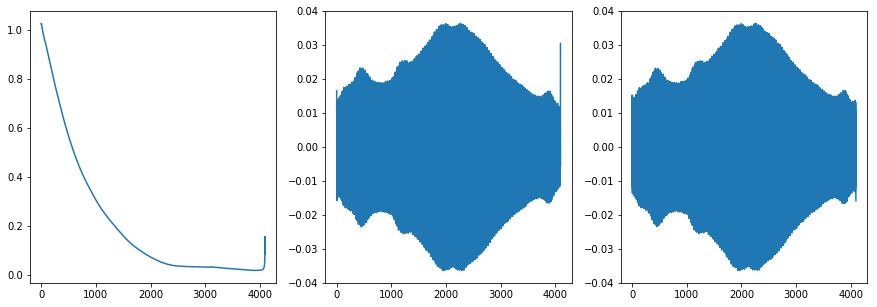

In [849]:
A, U, V = SSA_modes(F, 1000)
plt.figure(figsize=(15,5))
F1_1 = SSA_group(A, U, V, len(F),  [0])
plt.subplot(1,3,1)
plt.plot(F1_1)
F1_2 = SSA_group(A, U, V, len(F),  [1])
plt.subplot(1,3,2)
plt.plot(F1_2)
F1_3 = SSA_group(A, U, V, len(F),  [2])
plt.subplot(1,3,3)
plt.plot(F1_3)
plt.show()

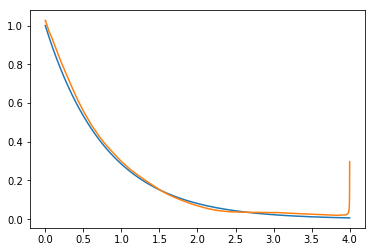

In [847]:
I = [0]
F1 = SSA_group(A, U, V, len(F),  I)
plt.plot(t, np.exp(-0.4*np.pi*t))
plt.plot(t,F1)
plt.show()

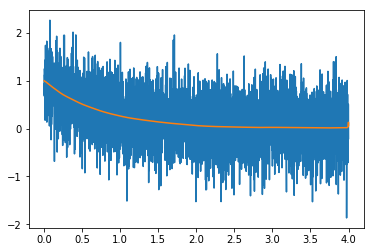

In [789]:
I = [0]
F1 = SSA_group(A, U, V, len(F),  I)
plt.plot(t, F)
plt.plot(t,F1)
plt.show()

## ВР из 4 гармоник с шумом

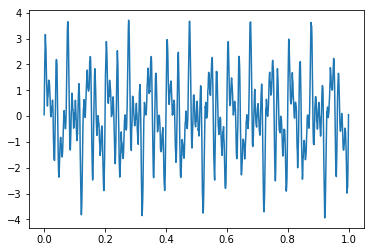

In [97]:
def func(x, t):
    return np.sin(2 * np.pi * x * t)

t = np.linspace(0, 1, 1024) 
f1 = 15
f2 = 30
f3 = 55
f4 = 80
F = func(f1,t) + func(f2,t) + func(f3,t) + func(f4,t)  + 0.1 * rand.randn(len(t)) 
plt.plot(t, F)
plt.show() 

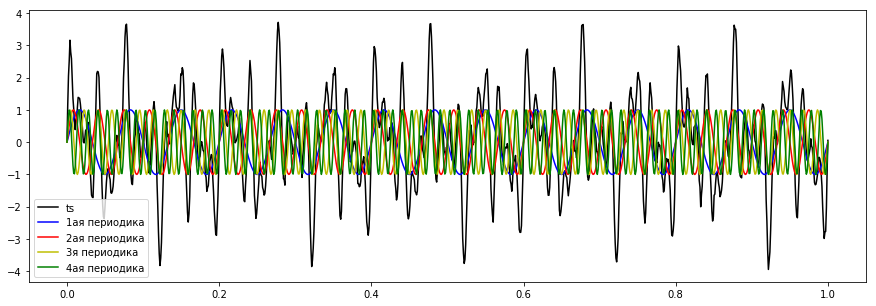

In [98]:
plt.figure(figsize = (15, 5))
plt.plot(t, F, 'k', label = 'ts')
plt.plot(t, func(f1,t), 'b', label = '1ая периодика')
plt.plot(t, func(f2,t), 'r', label = '2ая периодика')
plt.plot(t, func(f3,t), 'y', label = '3я периодика')
plt.plot(t, func(f4,t), 'g', label = '4ая периодика')
plt.legend()
plt.show()

min = 255
min = 277
min = 25


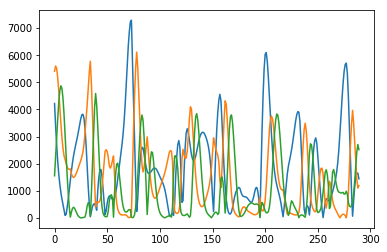

In [111]:
for i in range(0,3): 
    gr=[] 
    for L in range (10,300): 
        A, U, V = SSA_modes(F, L) 
        gr.append(abs(A[i+1]-A[i])) 
    print("min = {}" .format(gr.index(min(gr[10:])))) 
    plt.plot(gr)

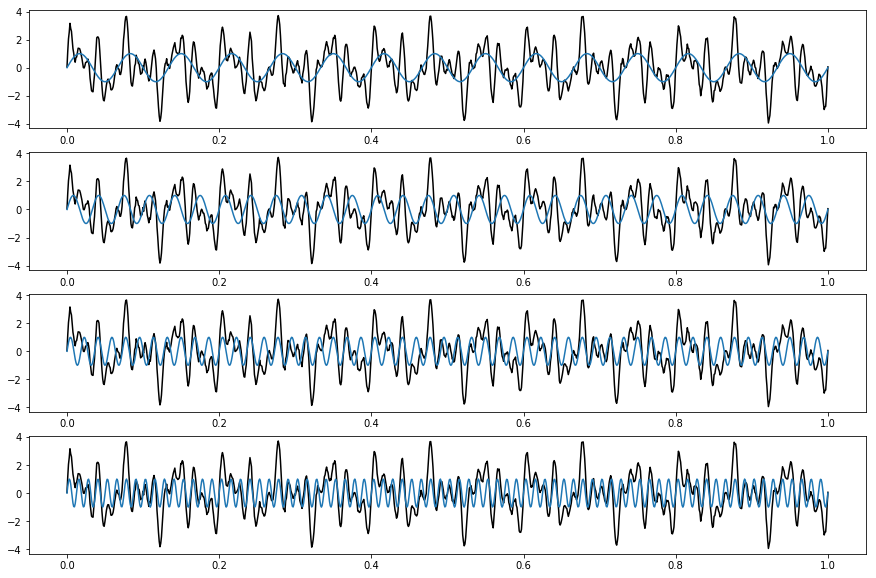

In [99]:
plt.figure(figsize = (15, 10)) 
plt.subplot(4,1,1)
plt.plot(t, F, 'k', label = 'ts')
plt.plot(t, func(f1,t)) 
plt.subplot(4,1,2)
plt.plot(t, F, 'k', label = 'ts')
plt.plot(t, func(f2,t)) 
plt.subplot(4,1,3)
plt.plot(t, F, 'k', label = 'ts')
plt.plot(t, func(f3,t)) 
plt.subplot(4,1,4)
plt.plot(t, F, 'k', label = 'ts')
plt.plot(t, func(f4,t)) 
plt.show() 

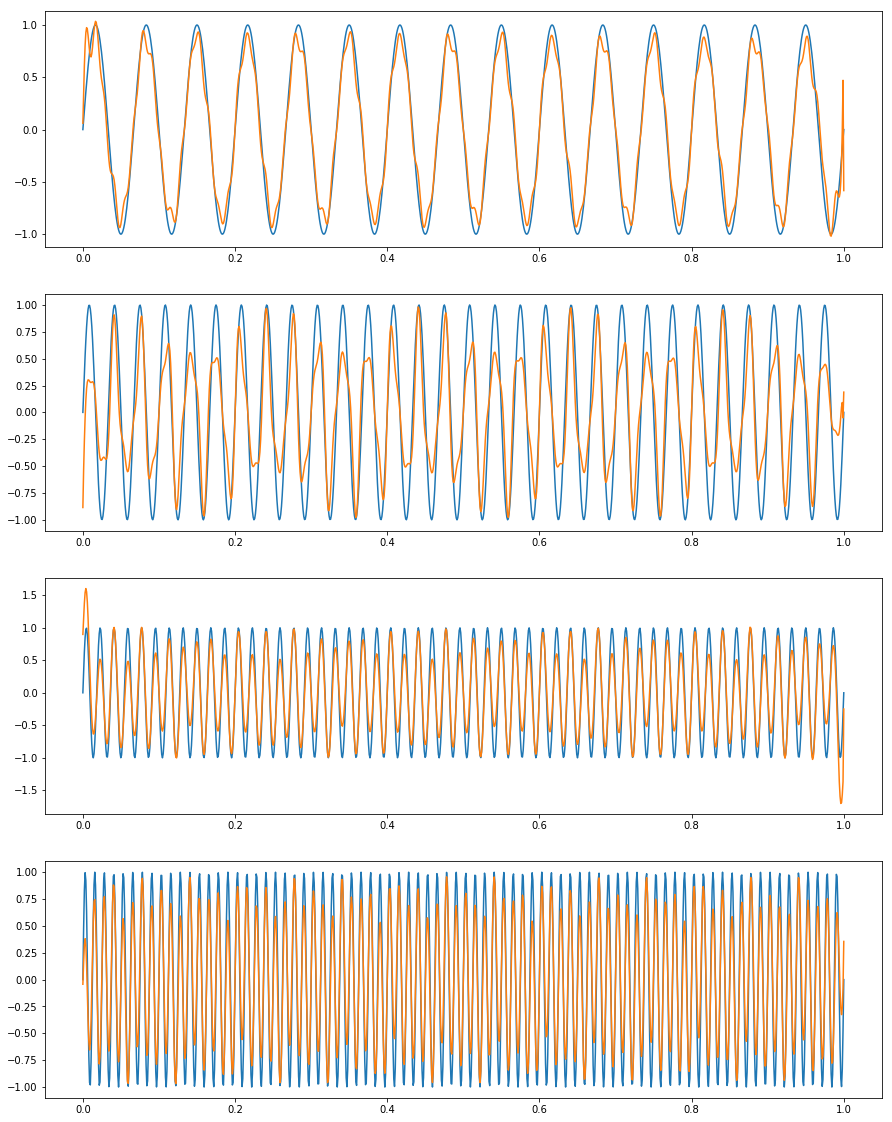

In [148]:
A, U, V = SSA_modes(F, 500)
plt.figure(figsize=(15,20))
F1_1 = SSA_group(A, U, V, len(F),  [0,7])
plt.subplot(4,1,1)
plt.plot(t, np.sin(2 * np.pi * f1 * t)) 
plt.plot(t, F1_1)
F1_2 = SSA_group(A, U, V, len(F),  [3,6])
plt.subplot(4,1,2)
plt.plot(t, np.sin(2 * np.pi * f2 * t)) 
plt.plot(t, F1_2)
F1_3 = SSA_group(A, U, V, len(F),  [1,2])
plt.subplot(4,1,3)
plt.plot(t, np.sin(2 * np.pi * f3 * t)) 
plt.plot(t, F1_3)
F1_4 = SSA_group(A, U, V, len(F),  [4,5])
plt.subplot(4,1,4)
plt.plot(t, np.sin(2 * np.pi * f4 * t)) 
plt.plot(t, F1_4)
plt.show()

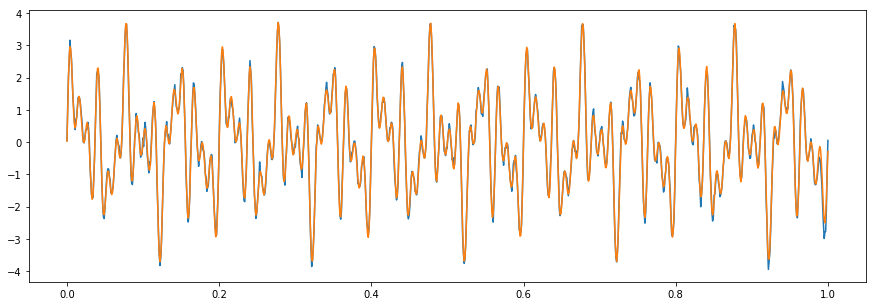

In [153]:
I = [0,7,3,6,1,2,4,5]
F1 = SSA_group(A, U, V, len(F),  I)
plt.figure(figsize=(15,5))
plt.plot(t, F)
plt.plot(t,F1)
plt.show()

## Сигнал с изломом частоты

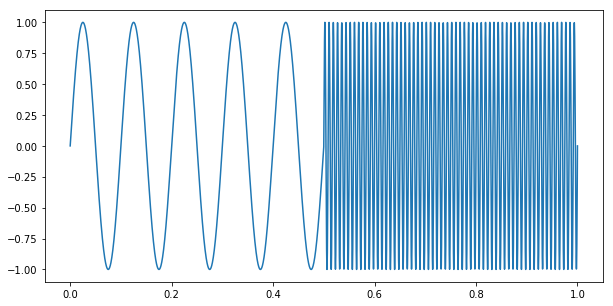

In [937]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
    x2[i] = np.sin(2*np.pi*10*t[i]) 
for i in range(len(t)//2, len(t)):
    x2[i] = np.sin(2*np.pi*120*t[i])
plt.figure(figsize = (10, 5))
plt.plot(t, x2)
plt.show()

In [938]:
F = x2

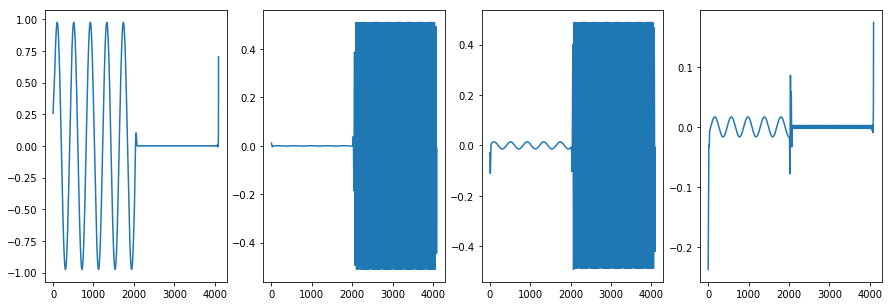

In [939]:
A, U, V = SSA_modes(F, 35)
plt.figure(figsize=(15,5))
F1_1 = SSA_group(A, U, V, len(F),  [0])
plt.subplot(1,4,1)
plt.plot(F1_1)
F1_2 = SSA_group(A, U, V, len(F),  [1])
plt.subplot(1,4,2)
plt.plot(F1_2)
F1_3 = SSA_group(A, U, V, len(F),  [2])
plt.subplot(1,4,3)
plt.plot(F1_3)
F1_4 = SSA_group(A, U, V, len(F),  [3])
plt.subplot(1,4,4)
plt.plot(F1_4)
plt.show()

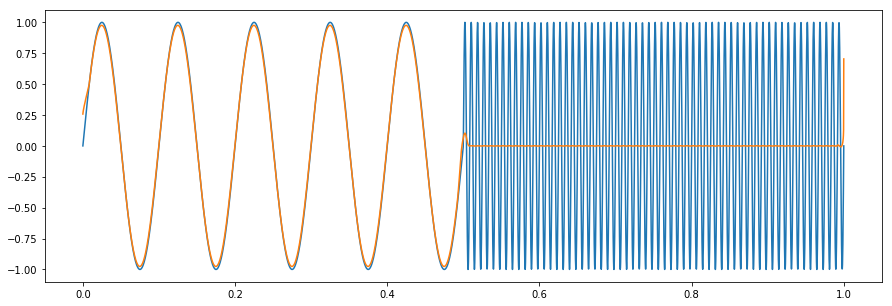

In [940]:
plt.figure(figsize=(15,5))
I = [0]
F1 = SSA_group(A, U, V, len(F),  I)
plt.plot(t, F)
plt.plot(t, F1)
plt.show()

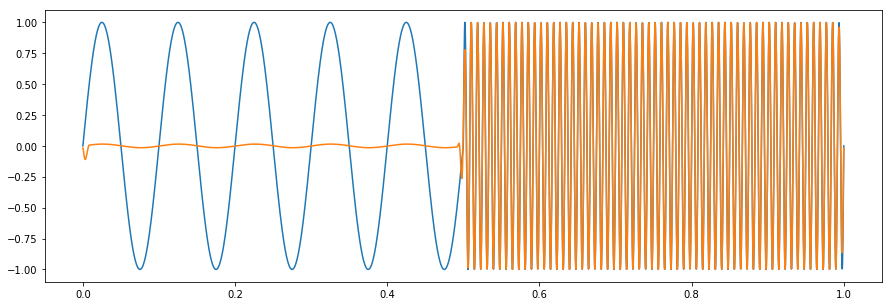

In [943]:
plt.figure(figsize=(15,5))
I = [1,2]
F1 = SSA_group(A, U, V, len(F),  I)
plt.plot(t, F)
plt.plot(t, F1)
plt.show()

## ВР из файла

In [185]:
file = h5py.File('LR5_materials/lab5.mat','r')
data = file.get('EEG')
eeg = np.array(data).T

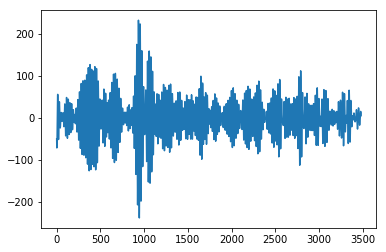

In [186]:
plt.plot(eeg)

In [187]:
F = eeg
len(F)

3481

min = 68
min = 12
min = 135


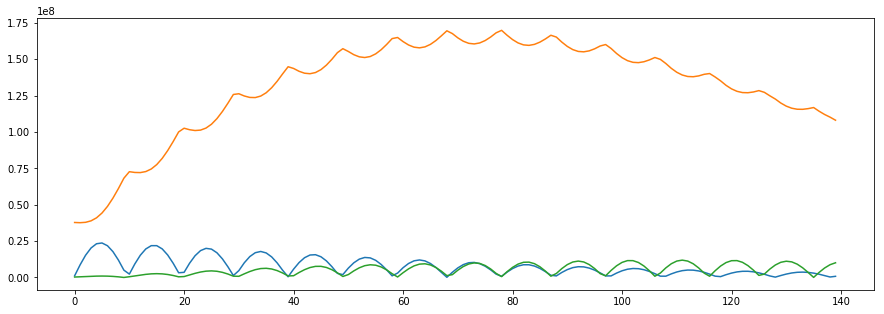

In [261]:
plt.figure(figsize=(15,5))
for i in range(0,3): 
    gr=[] 
    for L in range (10, 150): 
        A, U, V = SSA_modes(F, L) 
        gr.append(abs(A[i+1]-A[i])) 
    print("min = {}" .format(gr.index(min(gr[10:])))) 
    plt.plot(gr)

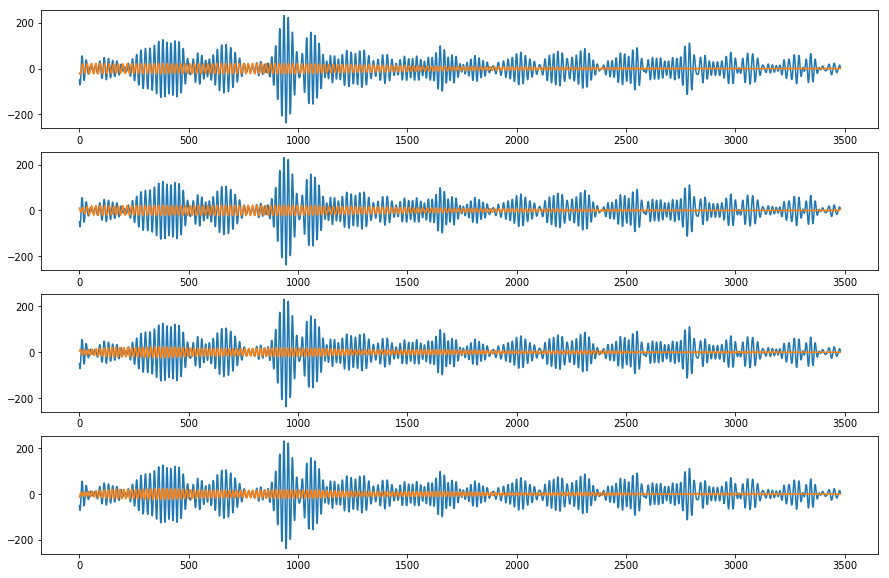

In [331]:
# 330
A, U, V = SSA_modes(F,1740)
plt.figure(figsize=(15,10))
F1_1 = SSA_group(A, U, V, len(F),  [0])
plt.subplot(4,1,1)
plt.plot(F)
plt.plot(F1_1)
F1_2 = SSA_group(A, U, V, len(F),  [1])
plt.subplot(4,1,2)
plt.plot(F)
plt.plot(F1_2)
F1_3 = SSA_group(A, U, V, len(F),  [2])
plt.subplot(4,1,3)
plt.plot(F)
plt.plot(F1_3)
F1_4 = SSA_group(A, U, V, len(F),  [3])
plt.subplot(4,1,4)
plt.plot(F)
plt.plot(F1_4)
plt.show()

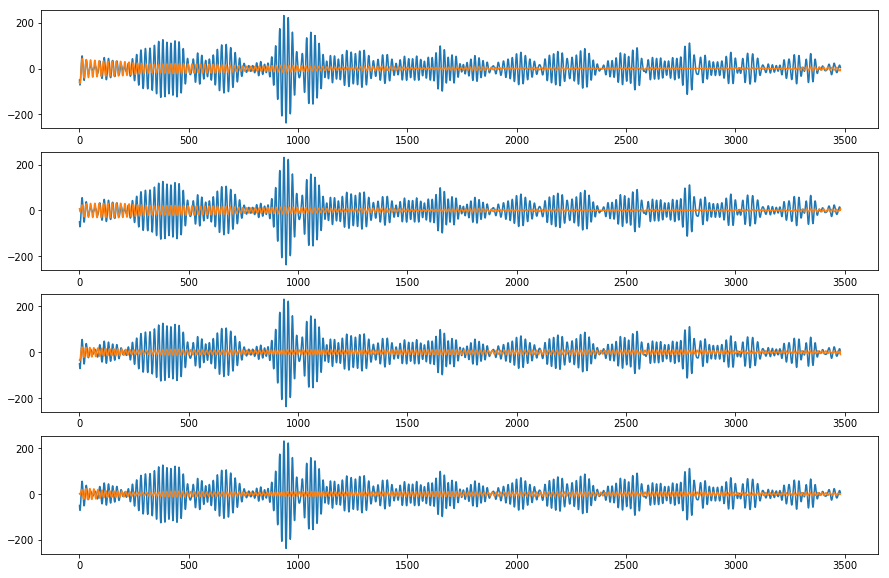

In [332]:
plt.figure(figsize=(15,10))
F1_1 = SSA_group(A, U, V, len(F),  [4])
plt.subplot(4,1,1)
plt.plot(F)
plt.plot(F1_1)
F1_2 = SSA_group(A, U, V, len(F),  [5])
plt.subplot(4,1,2)
plt.plot(F)
plt.plot(F1_2)
F1_3 = SSA_group(A, U, V, len(F),  [6])
plt.subplot(4,1,3)
plt.plot(F)
plt.plot(F1_3)
F1_4 = SSA_group(A, U, V, len(F),  [7])
plt.subplot(4,1,4)
plt.plot(F)
plt.plot(F1_4)
plt.show()

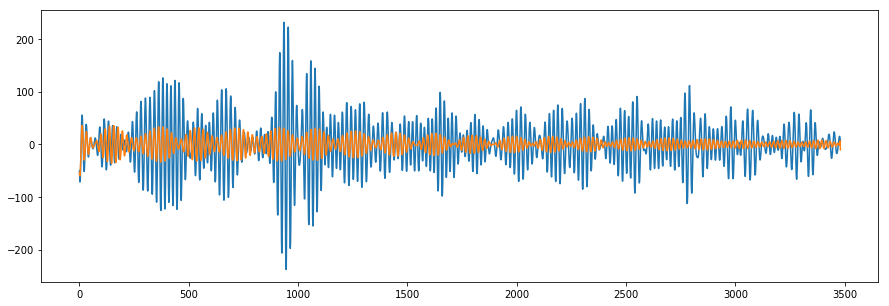

In [217]:
plt.figure(figsize=(15,5))
I = [0,6]
F1 = SSA_group(A, U, V, len(F),  I)
plt.plot(F)
plt.plot(F1)
plt.show()
# 1740